<a href="https://colab.research.google.com/github/hex0x0/enem-analise-dados/blob/main/dados_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
import string

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MICRODADOS_ENEM_2020.csv", encoding="ISO-8859-1", sep=";")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gera uma lista com as colunas do dataset

In [ ]:
cols = df.columns.tolist()

In [ ]:
df.head(3)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,"2,00006E+11",2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2,00001E+11",2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2,00002E+11",2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A


In [ ]:
dados_selecionados = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [ ]:
novo_df = df.filter(items=dados_selecionados)

In [ ]:
COLUNA_TP_FAIXA_ETARIA = novo_df['TP_FAIXA_ETARIA']

In [ ]:
COLUNA_TP_FAIXA_ETARIA.value_counts()

3     229287
2     202940
4     130174
5      82477
11     71313
6      56307
1      51292
12     39879
7      39792
8      33229
13     27638
9      27222
10     23176
14     16331
15      9255
16      4860
17      2238
18       815
19       264
20        86
Name: TP_FAIXA_ETARIA, dtype: int64

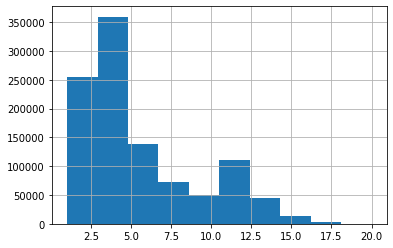

In [ ]:
COLUNA_TP_FAIXA_ETARIA.hist(bins=10)

Verifica a quantidade de linhas e colunas do dataset

In [ ]:
print('Número de linhas:\t {}'.format(df.shape[0]))
print('Número de colunas:\t {}'.format(df.shape[1]))

Número de linhas:	 1048575
Número de colunas:	 76


Ao verificar o percentual de dados ausentes, descobrimos que os dados referentes a localização da escola, Código da UF da escola, Situação de funcionários da escola, dados sobre dependência administrativa (escola), e sigla da UF da escola estavam com alto percentual de ausência. Portanto, serão excluídos do dataset.

In [ ]:
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

TP_LOCALIZACAO_ESC        78.470973
CO_UF_ESC                 78.470973
TP_SIT_FUNC_ESC           78.470973
TP_DEPENDENCIA_ADM_ESC    78.470973
SG_UF_ESC                 78.470973
                            ...    
TP_PRESENCA_LC             0.000000
TP_PRESENCA_MT             0.000000
NU_ANO                     0.000000
TP_LINGUA                  0.000000
NU_INSCRICAO               0.000000
Length: 76, dtype: float64

Utilizando o describe para ter uma noção mais geral de como estão distribuídos os dados

In [ ]:
novo_df.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_PRESENCA_CN,...,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,356881.000000,1.048575e+06,1.048575e+06,...,606222.000000,635840.000000,635840.000000,606222.000000,606222.000000,635840.000000,635840.000000,606222.000000,635840.000000,973766.000000
mean,5.306293e+00,1.055124e+00,2.137990e+00,1.032624e+00,1.530033e+00,2.341235e+00,1.406598e+00,1.006386,8.281048e-02,5.786730e-01,...,604.009284,574.729728,584.502339,594.224228,494.616188,519.422297,530.103824,525.720676,612.205586,3.793361
std,3.754783e+00,4.042238e-01,1.012808e+00,2.097520e-01,6.606320e-01,3.876861e+00,5.893752e-01,0.079656,2.755957e-01,4.943125e-01,...,22.191170,25.307294,24.301887,23.143935,81.772901,96.500124,73.332113,119.809999,201.016594,1.417648
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,...,597.000000,567.000000,577.000000,587.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,...,598.000000,568.000000,578.000000,588.000000,429.400000,444.700000,485.500000,429.000000,500.000000,3.000000
50%,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,1.000000e+00,...,599.000000,569.000000,579.000000,589.000000,487.900000,521.200000,535.900000,509.000000,600.000000,4.000000
75%,7.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000,0.000000e+00,1.000000e+00,...,600.000000,570.000000,580.000000,590.000000,554.000000,589.000000,581.300000,608.100000,760.000000,4.000000
max,2.000000e+01,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,1.400000e+01,3.000000e+00,2.000000,1.000000e+00,2.000000e+00,...,702.000000,690.000000,694.000000,698.000000,854.800000,862.600000,778.400000,975.000000,1000.000000,20.000000


Eliminando dados NAN do dataset e dados dos participantes treineiros




In [ ]:
novod_df = novo_df.dropna(inplace=True)
novo_df = novo_df[novo_df.IN_TREINEIRO <= 0]

Eliminando os estudantes que faltaram em qualquer uma das provas

In [ ]:
for col in ['TP_PRESENCA_CH', 'TP_PRESENCA_CN']:
  df = df[df[col] == 1]
    

Eliminando estudantes que tiveram a nota zerada

In [ ]:
df = df[df['NU_NOTA_MT'] != 0]

Calculando nota média dos alunos

In [ ]:
novo_df['MEDIA_NOTA'] = (novo_df['NU_NOTA_CH'] + novo_df['NU_NOTA_CN'] + novo_df['NU_NOTA_LC'] + novo_df['NU_NOTA_MT'] + novo_df['NU_NOTA_REDACAO']) / 5.0

In [ ]:
coluna_media = novo_df['MEDIA_NOTA']

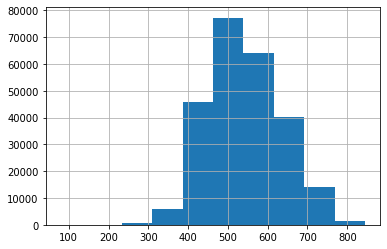

In [ ]:
coluna_media.hist()

Outra forma de se obter a média dos alunos (mais elegante)

In [ ]:
novo_df = novo_df[['NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']].mean()

Distribuição do número de alunos por nível de renda
---



O maior número de alunos têm renda média até 1.045 reais

In [ ]:
renda = list(string.ascii_uppercase[:17])

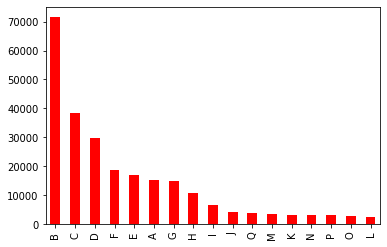

In [ ]:
novo_df['Q006'].value_counts().plot.bar(color="red")

Distribuição das médias dos alunos de acordo com renda informada no censo

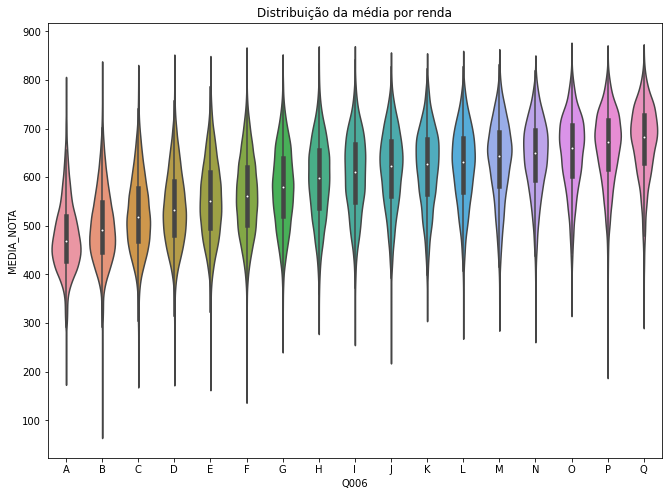

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


sns.violinplot(
    
    x = 'Q006', 
    y = 'MEDIA_NOTA',
    data=novo_df, 
    order=renda
)

plt.title('Distribuição da média por renda')
plt.show()

Verificando a distribuição de notas em matemática conforme a renda

In [ ]:
col = 'Q006'
nota_matematica = 'NU_NOTA_MT'
A = 'Nenhuma Renda'
B = 'Até R$ 1.045,00'
C = 'De R$ 1.045,01 até R$ 1.567,50'
D = 'De R$ 1.567,51 até R$ 2.090,00'
E = 'De R$ 2.090,01 até R$ 2.612,50'
F = 'De R$ 2.612,51 até R$ 3.135,00'
G = 'De R$ 3.135,01 até R$ 4.180,00'
H = 'De R$ 4.180,01 até R$ 5.225,00'
I = 'De R$ 5.225,01 até R$ 6.270,00'
J = 'De R$ 6.270,01 até R$ 7.315,00'
K = 'De R$ 7.315,01 até R$ 8.360,00'
L = 'De R$ 8.360,01 até R$ 9.405,00'
M = 'De R$ 9.405,01 até R$ 10.450,00'
N = 'De R$ 10.450,01 até R$ 12.540,00'
O = 'De R$ 12.540,01 até R$ 15.675,00'
P = 'De R$ 15.675,01 até R$ 20.900,00'
Q = 'Acima de R$ 20.900,00'


In [ ]:
categoria = pd.concat([novo_df[nota_matematica], novo_df[col].map({'A':A, 'B':B, 'C':C, 'D':D, 'E':E, 'F':F, 'G':G, 'H':H, 'I':I, 
 'J':J, 'K':K, 'L':L, 'M':M, 'N':N, 'O':O, 'P':P, 'Q':Q                                   
                                    
                                    })], axis=1)

[Text(0.5, 1.0, 'Distribuição das notas por renda')]

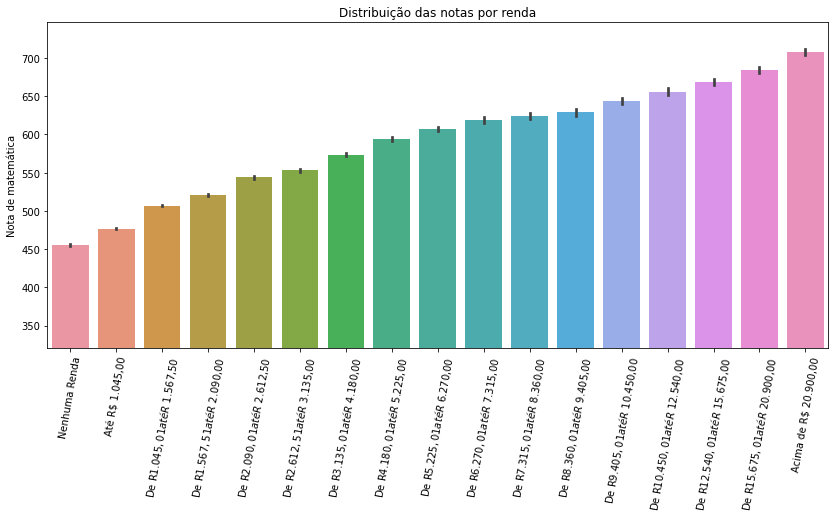

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
fig = sns.barplot(x = col, y = nota_matematica, data=categoria, order=[A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q], estimator=np.mean)

fig.axis(ymin=320)

ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

ax.set(ylabel='Nota de matemática')
ax.set(xlabel='')
ax.set(title='Distribuição das notas por renda')

Distribuição das notas em relação ao sexo do candidato

In [ ]:
dist_sexo = ['TP_SEXO', 'NU_NOTA_REDACAO']


In [ ]:
dataframe_sexo = novo_df.filter(items = dist_sexo).dropna()

In [ ]:
dataframe_sexo.head()


,TP_SEXO,NU_NOTA_REDACAO
88,M,700.0
321,M,580.0
583,F,960.0
623,F,960.0
829,M,580.0


Agrupa por sexo

In [ ]:
dataframe_sexo.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,30622
M,17815


Nota máxima

In [ ]:
dataframe_sexo.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,980.0


Distribuição das notas de Ciências da Natureza por sexo

[Text(0.5, 1.0, 'Sexo')]

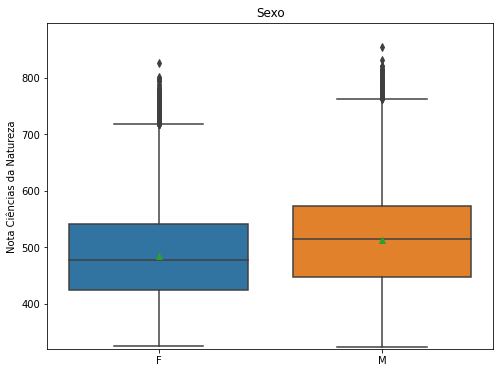

In [ ]:
var_dependente = 'NU_NOTA_CN'

var = 'TP_SEXO'


plotdata = pd.concat([novo_df[var_dependente], novo_df[var]], axis=1)

f, ax = plt.subplots(figsize=(8, 6))

fig = sns.boxplot(x=var, y = var_dependente, data=plotdata, showmeans=True)

fig.axis(ymin=320)
ax.set(ylabel='Nota Ciências da Natureza')
ax.set(xlabel='')
ax.set(title='Sexo')





Distribuição das notas de matemática por raça/cor

Existe uma ligeira vantagem dos brancos em relação às outras raças, mas nada que sirva adequadamente para prever uma nota alta em matemática. 

[Text(0.5, 1.0, 'Distribuição das notas por raça')]

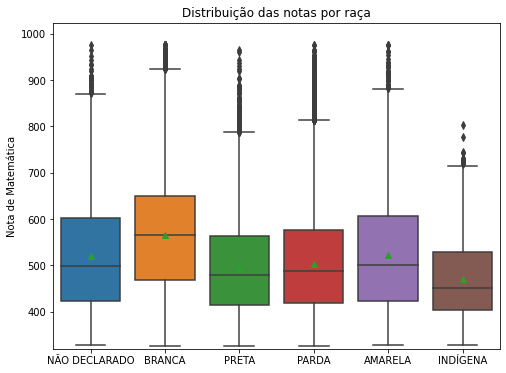

In [ ]:
var_dependente  = 'NU_NOTA_MT'

A = 'NÃO DECLARADO'
B = 'BRANCA'
C = 'PRETA'
D = 'PARDA'
E = 'AMARELA'
F = 'INDÍGENA'


var = 'TP_COR_RACA'


plotdata = pd.concat([novo_df[var_dependente], novo_df[var].map({0:A, 1: B, 2:C, 3:D, 4:E, 5:F})], axis=1)

f, ax = plt.subplots(figsize=(8, 6))

fig = sns.boxplot(x = var, y = var_dependente, data=plotdata, order=[A, B, C, D, E, F], showmeans=True)

fig.axis(ymin=320)

fig.set(ylabel='Nota de Matemática')
fig.set(xlabel='')
fig.set(title="Distribuição das notas por raça")







Média dos alunos por tipo de escola

[Text(0.5, 1.0, 'Distribuição das médias dos alunos por tipo de escola')]

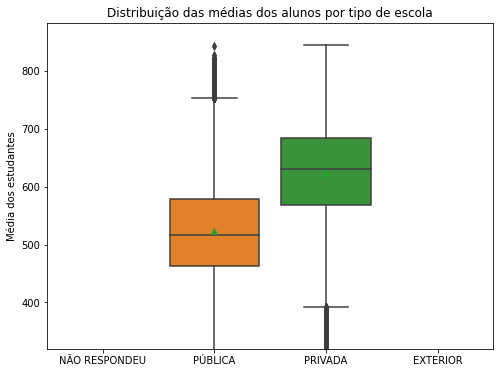

In [ ]:
var_dependente = 'MEDIA_NOTA'

var = 'TP_ESCOLA'

A = 'NÃO RESPONDEU'
B = 'PÚBLICA'
C = 'PRIVADA'
D = 'EXTERIOR'


plotzinho = pd.concat([novo_df[var_dependente], novo_df[var].map({1:A, 2:B, 3:C, 4: D})], axis=1)


f, ax = plt.subplots(figsize=(8, 6))

fig = sns.boxplot(x = var, y = var_dependente, data = plotzinho, order = [A, B, C, D], showmeans=True)


fig.axis(ymin=320)

fig.set(ylabel='Média dos estudantes')
fig.set(xlabel='')
fig.set(title='Distribuição das médias dos alunos por tipo de escola')








Distribuição da nota da redação por renda

As notas das redações, como se vê, também são influenciadas pela renda familiar.

In [ ]:
var_dependente = 'NU_NOTA_REDACAO'

col_teste = 'Q006'


A = 'Nenhuma Renda'
B = 'Até R$ 1.045,00'
C = 'De R$ 1.045,01 até R$ 1.567,50'
D = 'De R$ 1.567,51 até R$ 2.090,00'
E = 'De R$ 2.090,01 até R$ 2.612,50'
F = 'De R$ 2.612,51 até R$ 3.135,00'
G = 'De R$ 3.135,01 até R$ 4.180,00'
H = 'De R$ 4.180,01 até R$ 5.225,00'
I = 'De R$ 5.225,01 até R$ 6.270,00'
J = 'De R$ 6.270,01 até R$ 7.315,00'
K = 'De R$ 7.315,01 até R$ 8.360,00'
L = 'De R$ 8.360,01 até R$ 9.405,00'
M = 'De R$ 9.405,01 até R$ 10.450,00'
N = 'De R$ 10.450,01 até R$ 12.540,00'
O = 'De R$ 12.540,01 até R$ 15.675,00'
P = 'De R$ 15.675,01 até R$ 20.900,00'
Q = 'Acima de R$ 20.900,00'






In [ ]:
df_redacao = pd.concat([novo_df[var_dependente], novo_df[col_teste].map({'A':A, 'B':B, 'C':C, 'D':D, 'E':E, 'F':F, 'G':G, 'H':H, 'I':I, 
 'J':J, 'K':K, 'L':L, 'M':M, 'N':N, 'O':O, 'P':P, 'Q':Q                                   
                                    
                                    })], axis=1)

[Text(0.5, 1.0, 'Distribuição dos participantes por nota de redação')]

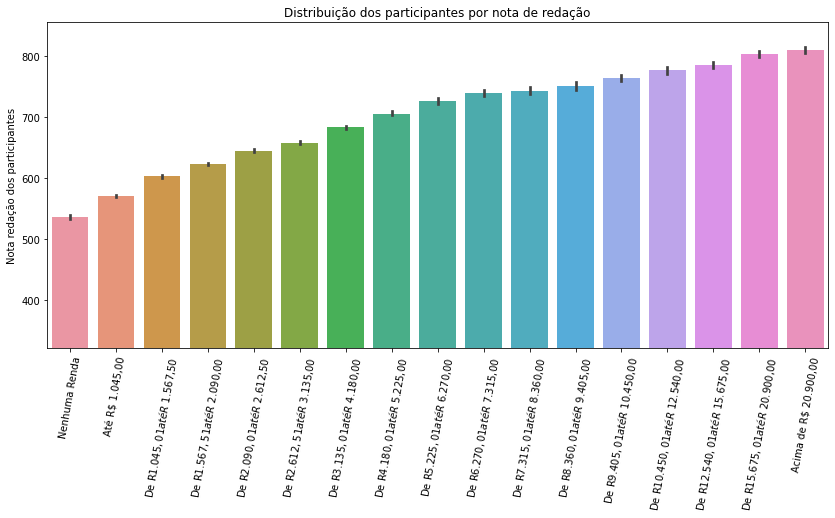

In [ ]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.barplot(x = col_teste, y = var_dependente, data=df_redacao, order=[A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q], estimator=np.mean)


fig.axis(ymin=320)

ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

fig.set(ylabel='Nota redação dos participantes')

fig.set(xlabel='')

fig.set(title='Distribuição dos participantes por nota de redação')







Notas da redações dos candidatos distribuídas em torno da escoloridade da mãe

[Text(0.5, 1.0, 'Distribuição das notas da redação segundo a escolaridade da mãe')]

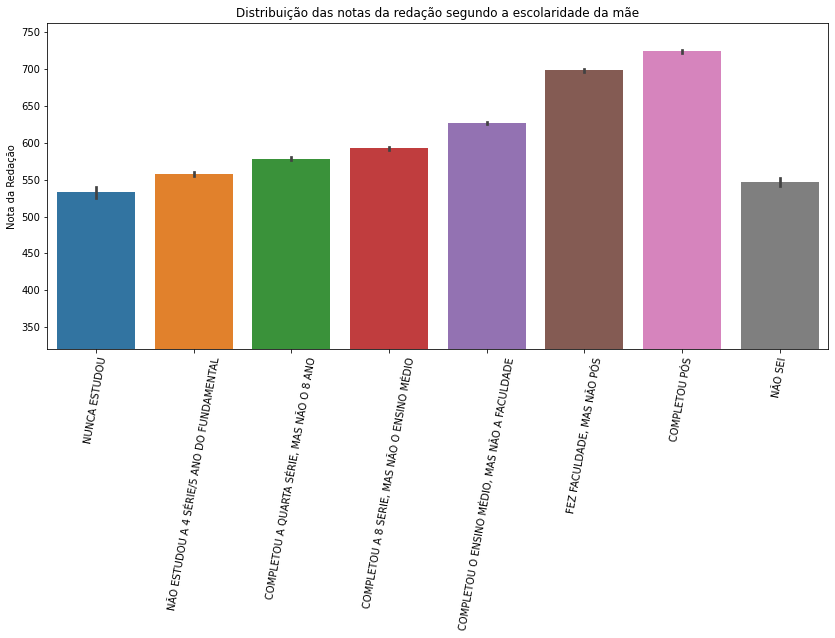

In [ ]:
A = 'NUNCA ESTUDOU'
B = 'NÃO ESTUDOU A 4 SÉRIE/5 ANO DO FUNDAMENTAL'
C = 'COMPLETOU A QUARTA SÉRIE, MAS NÃO O 8 ANO'
D = 'COMPLETOU A 8 SERIE, MAS NÃO O ENSINO MÉDIO'
E = 'COMPLETOU O ENSINO MÉDIO, MAS NÃO A FACULDADE'
F = 'FEZ FACULDADE, MAS NÃO PÓS'
G = 'COMPLETOU PÓS'
H = 'NÃO SEI'


var_int = 'NU_NOTA_REDACAO'

col_socio = 'Q002'



plotdata = pd.concat([novo_df[var_int], novo_df[col_socio].map({'A': A, 'B':B, 'C':C, 'D':D, 'E':E, 'F':F, 'G':G, 'H':H})], axis=1)

f, ax = plt.subplots(figsize=(14, 6))

fig = sns.barplot(x = col_socio, y = var_int, data=plotdata, order=[A, B, C, D, E, F, G, H], estimator=np.mean)

fig.axis(ymin=320)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
fig.set(ylabel='Nota da Redação')
fig.set(xlabel='')
fig.set(title='Distribuição das notas da redação segundo a escolaridade da mãe')







Exemplo com scikit-learn para construção de árvore de decisão

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils


In [ ]:
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

df_enem = novo_df.filter(items=features)


Verificando a correlação das variáveis acima através de um mapa de calor

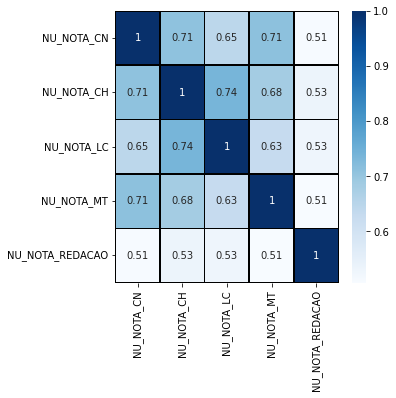

In [ ]:
plt.figure(figsize=(5, 5))

sns.heatmap(novo_df[features].corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()


In [ ]:
y = novo_df['NU_NOTA_REDACAO']
x_treino = novo_df[features]


#padroniza meus dados
scaler = preprocessing.StandardScaler().fit(x_treino)


#O objeto scaler armazena as médias e desvios padrão para cada recurso no conjunto de treino 


x_treino_escalado = scaler.transform(x_treino)


print('Media {}'.format(x_treino_escalado.mean(axis=1)))
print('Desvio padrão {}'.format(x_treino_escalado.std(axis=1)))

Media [-0.21949122 -1.17032166 -0.04696294 ... -1.42317975 -0.06781671
  0.57305136]
Desvio padrão [0.29514975 0.53820118 0.98438578 ... 0.33281892 0.24929124 0.43033537]


Separando o dataset em dados de treino e teste

In [ ]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

novo_df['SOMA_NOTAS'] = novo_df[features].sum(axis=1)

features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
test_var = 'NU_NOTA_REDACAO'

dados_entrada = X = novo_df.loc[novo_df['SOMA_NOTAS'] != 0, features]
dados_saida = y = novo_df.loc[novo_df['SOMA_NOTAS'] != 0, test_var]

X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4321)





Cria um objeto para regressão linear

In [ ]:
from sklearn import linear_model

regre = linear_model.LinearRegression()


Realiza o ajuste do modelo

In [ ]:
model = regre.fit(X, y)






Obtém os valores ajustados

In [ ]:
y_est = regre.predict(X)

Obtendo o coeficiente de determinação

In [ ]:
sq_r = model.score(X, y)

print(sq_r)

0.35517045510117384


Visualizando as respostas previstas as notas das redações

In [ ]:
print(y_est)

[597.00348005 500.21396722 566.75838414 ... 417.96401027 630.25547573
 725.27426137]
